# Импорт библиотек

In [537]:
!pip install catboost

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

from catboost import CatBoostClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [539]:
from catboost import CatBoostClassifier

Версии у всех файлов должны совпадать

In [540]:
VERSION = 20

# Загрузка данных

In [541]:
df_test = pd.read_csv('test_AIC.csv')
df_test

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Изменение даты поставки 15,Изменение даты поставки 30,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8
0,273,269,6,8,1,1,64,1,9,22,1,1.0,45,36,9,11,9,6,6.560264,2,10.0,8,8,8,2,2,1,0.0,0.0,0.0,0,0,0,1.0,16,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0
1,499,27439,1,10,18,16,1,14,1,35,2,1.0,0,0,9,9,9,3,4.362439,6,200.0,4,4,4,0,1,0,0.0,0.0,0.0,0,0,0,1.0,12,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
2,86,27439,2,2,1,1,172,1,1,26,2,0.0,28,20,12,1,12,4,7.315035,1,230.0,6,6,6,1,1,1,3.0,3.0,3.0,0,1,1,1.0,12,3.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
3,97,4064,2,4,7,1,22,6,3,46,1,0.0,43,43,1,3,1,3,2.883392,6,0.2,7,8,8,1,1,1,2.0,2.0,2.0,0,1,1,1.0,16,7.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0
4,117,27439,2,3,1,1,2,1,1,2,1,1.0,12,3,4,4,4,3,7.333641,7,1.0,7,7,7,1,1,1,1.0,1.0,1.0,0,1,1,1.0,15,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,255,6409,3,6,3,1,10,3,1,16,2,0.0,155,54,1,6,1,6,6.537037,5,30.0,10,10,10,2,2,2,0.0,0.0,0.0,1,0,0,2.0,18,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
24996,1,5827,1,1,7,1,46,6,1,13,1,0.0,74,74,11,1,11,3,7.425021,4,50.0,8,8,8,2,2,2,4.0,4.0,4.0,1,1,1,2.0,0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
24997,8,6504,6,5,3,1,17,3,1,21,2,1.0,5,5,11,12,12,3,5.703462,13,2.0,6,6,6,1,1,1,0.0,0.0,0.0,0,0,0,1.0,9,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
24998,18,1309,7,17,1,1,44,1,1,142,2,1.0,36,36,1,2,1,3,9.059027,6,48.0,9,10,10,2,3,3,0.0,0.0,0.0,2,0,0,3.0,31,8.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0


In [542]:
df = pd.read_csv('train_AIC.csv')
df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Изменение даты поставки 15,Изменение даты поставки 30,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,1.0,1.0,0,1,1,1.0,11,82.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0.0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0.0,0.0,0,0,0,1.0,12,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,1.0,1.0,0,1,1,1.0,14,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0.0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,247,1402,1,10,2,2,58,2,1,25,2,0.0,76,60,8,10,8,2,7.668653,5,1330.0,7,8,8,4,2,2,2.0,2.0,2.0,1,1,1,2.0,27,14.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
224996,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0.0,0.0,0,0,0,1.0,11,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
224997,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,6.0,6.0,2,2,5,2.0,0,-1.0,4.0,4.0,0.0,0.0,-1.0,-1.0,-1.0,0
224998,1721,186,1,9,3,3,132,3,2,94,2,0.0,75,70,5,7,6,3,7.087512,9,1500.0,9,9,9,2,2,2,4.0,4.0,4.0,1,2,2,2.0,26,34.0,7.0,4.0,0.0,0.0,-1.0,-1.0,-1.0,0


# **Анализ данных**

Удаление дубликатов

In [543]:
df = df.drop_duplicates()
df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Изменение даты поставки 15,Изменение даты поставки 30,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,1.0,1.0,0,1,1,1.0,11,82.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0.0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0.0,0.0,0,0,0,1.0,12,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,1.0,1.0,0,1,1,1.0,14,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0.0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,247,1402,1,10,2,2,58,2,1,25,2,0.0,76,60,8,10,8,2,7.668653,5,1330.0,7,8,8,4,2,2,2.0,2.0,2.0,1,1,1,2.0,27,14.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
224996,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0.0,0.0,0,0,0,1.0,11,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0
224997,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,6.0,6.0,2,2,5,2.0,0,-1.0,4.0,4.0,0.0,0.0,-1.0,-1.0,-1.0,0
224998,1721,186,1,9,3,3,132,3,2,94,2,0.0,75,70,5,7,6,3,7.087512,9,1500.0,9,9,9,2,2,2,4.0,4.0,4.0,1,2,2,2.0,26,34.0,7.0,4.0,0.0,0.0,-1.0,-1.0,-1.0,0


Случайная выборка 10000 строк для анализа

In [544]:
print(f"Количество строк с y = 1: {len(df[df['y'] == 1])}")
print(f"Количество строк с y = 0: {len(df[df['y'] != 1])}")

Количество строк с y = 1: 31719
Количество строк с y = 0: 188623


In [545]:
df_y_1_1000 = df[df['y'] == 1].sample(10000)
df_y_0_1000 = df[df['y'] == 1].sample(10000)

In [546]:
def add_bad_colum(data, list_to_add):
    for col in list_to_add:
        print(pd.DataFrame(data[col]).value_counts()[:4])


name = 'Количество циклов согласования'
add_bad_colum(df_y_1_1000, [name])
add_bad_colum(df_y_0_1000, [name])

Количество циклов согласования
1.0                               6206
2.0                               1901
0.0                                986
3.0                                527
dtype: int64
Количество циклов согласования
1.0                               6164
2.0                               1928
0.0                                958
3.0                                571
dtype: int64


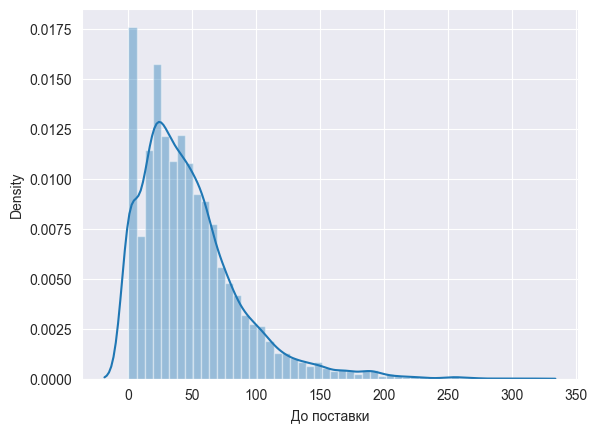

In [547]:
sns.distplot(df_y_1_1000["До поставки"]);

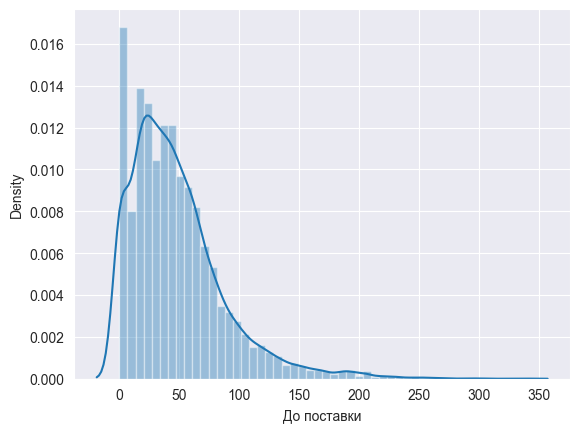

In [548]:
sns.distplot(df_y_0_1000["До поставки"]);

Распределение некоторых величин

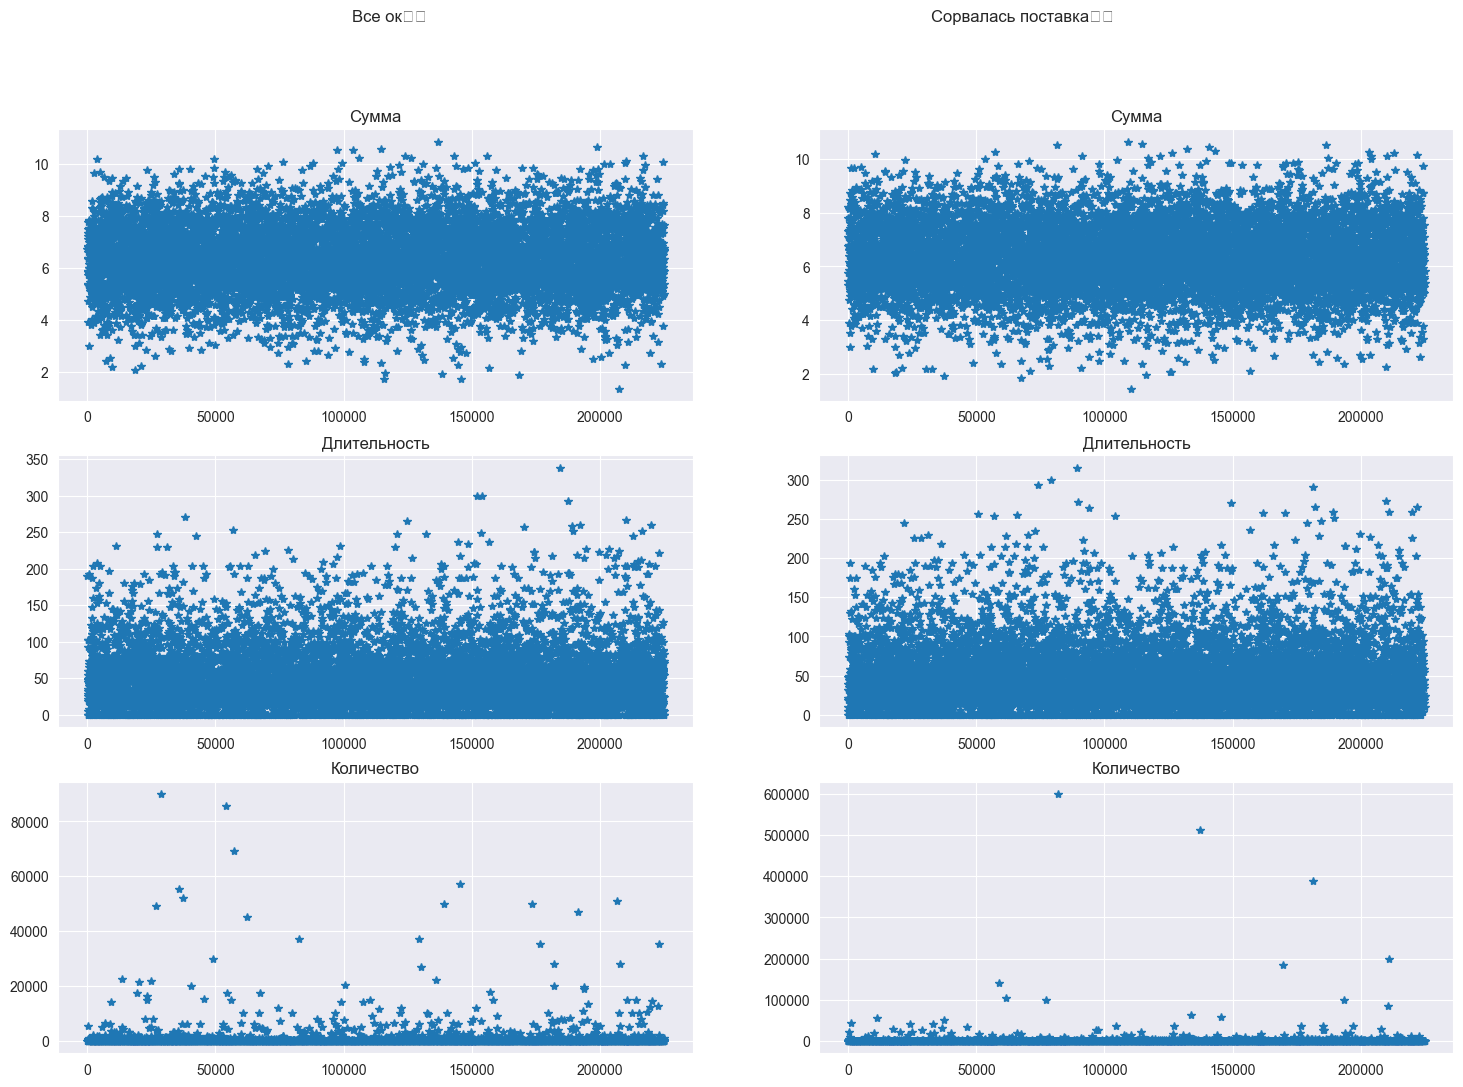

In [549]:
def graphs(df_y_0_1000, df_y_1_1000):
  col_analit = ['Сумма', 'Длительность', 'Количество']  # 'Длительность' 'Месяц1', 'Сумма', 'Количество',
  # 'Количество обработчиков 30', 'Количество обработчиков 7', 'Количество циклов согласования',
  # 'Количество изменений после согласований'
  num_col = len(col_analit)
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(num_col, 2)
  # ax = ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))
  ax = ((ax1, ax2), (ax3, ax4), (ax5, ax6))
  fig.set_size_inches(18, 12)
  fig.suptitle(
      'Все ок⬇️                                                                                                             Сорвалась поставка⬇️')
  for i in range(len(col_analit)):
      for dat in range(2):
          data = df_y_0_1000 if dat == 0 else df_y_1_1000
          ax[i][dat].plot(data[col_analit[i]], '*')
          ax[i][dat].set_title(f"{col_analit[i]}")
  plt.show()
graphs(df_y_0_1000, df_y_1_1000)

Объединение схожих дней

In [550]:
df['Дней между 2_4'] = df['Дней между 1_2'] + df['Дней между 2_3'] + df['Дней между 3_4']
df = df.drop(columns=['Дней между 1_2', 'Дней между 2_3', 'Дней между 3_4'])
df_test['Дней между 2_4'] = df_test['Дней между 1_2'] + df_test['Дней между 2_3'] + df_test['Дней между 3_4']
df_test = df_test.drop(columns=['Дней между 1_2', 'Дней между 2_3', 'Дней между 3_4'])

**Очень важный столбец, указывающий, что поставка произошла не раньше срока**

In [551]:
df['Раньше'] = df['Длительность'] == df['До поставки']
df_test['Раньше'] = df_test['Длительность'] == df_test['До поставки']

Графики для визуального анализа данных

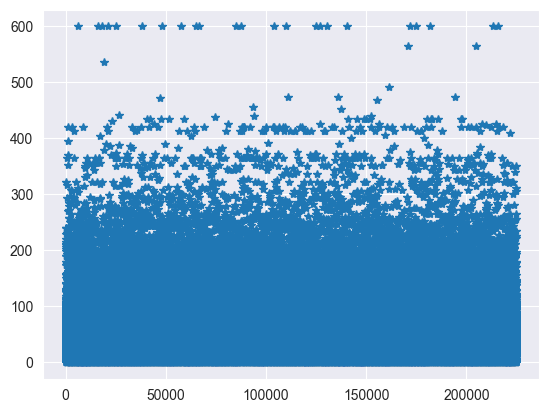

In [552]:
plt.plot(df[['Длительность']], '*')

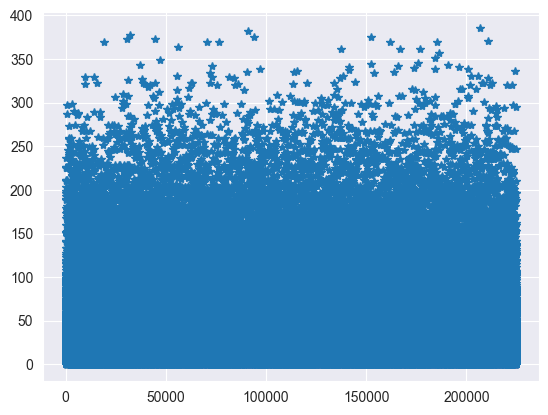

In [553]:
plt.plot(df[['До поставки']], '*')

In [554]:
_del1 = len(df_test[df_test['Длительность'] > 400])
_del2 = len(df[df['Длительность'] > 400])
print(f"Будет удалено в df_test: {_del1} строки")
print(f"Будет удалено в df_train: {_del2} строк")
df = df[df['Длительность'] < 400]

Будет удалено в df_test: 24 строки
Будет удалено в df_train: 142 строк


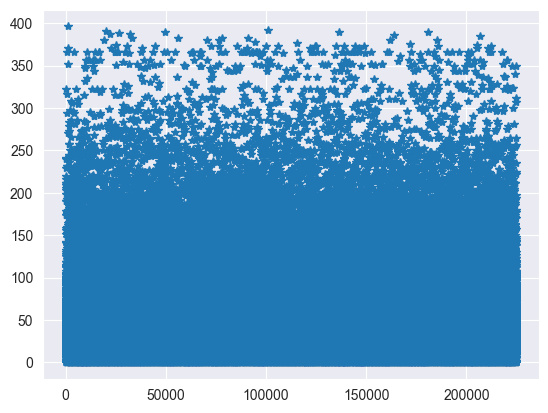

In [555]:
plt.plot(df[['Длительность']], '*')

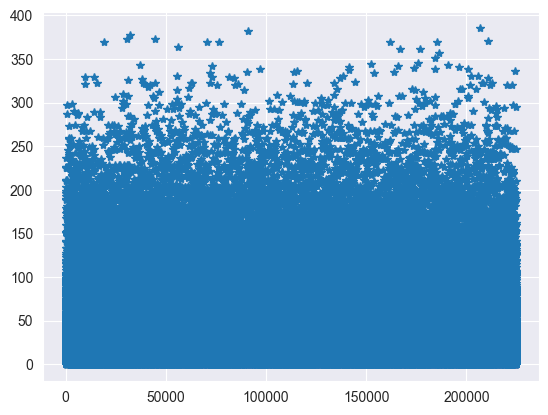

In [556]:
plt.plot(df[['До поставки']], '*')

In [557]:
_del1 = len(df_test[(df_test['Сумма'] < 1.5) | (df_test['Сумма'] > 11)])
_del2 = len(df[(df['Сумма'] < 1.5) | (df['Сумма'] > 11)])
print(f"Будет удалено в df_test: {_del1} строки")
print(f"Будет удалено в df_train: {_del2} строк")
df = df[(df['Сумма'] > 1.5) | (df['Сумма'] < 11)]

Будет удалено в df_test: 3 строки
Будет удалено в df_train: 39 строк


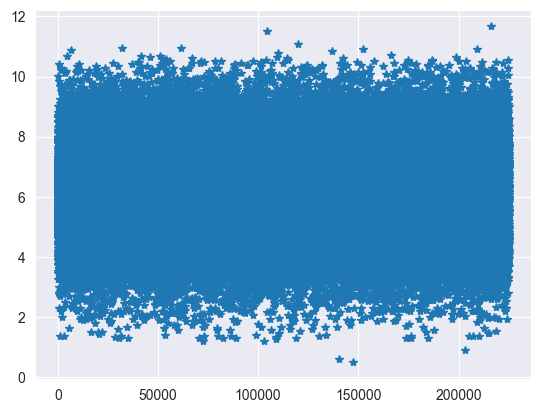

In [558]:
plt.plot(df['Сумма'], '*')

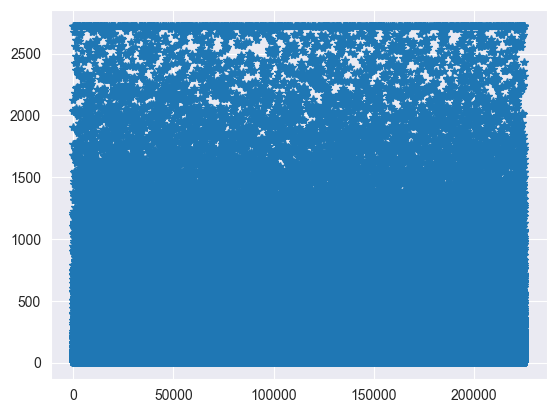

In [559]:
plt.plot(df['Поставщик'], '*')

In [560]:
df['Количество изменений после согласований'].value_counts().sort_index()

0       38229
2           1
3          20
4         260
5        1061
        ...  
4032        1
4471        1
5427        1
6097        1
6255        1
Name: Количество изменений после согласований, Length: 234, dtype: int64

In [561]:
df_test['Количество изменений после согласований'].value_counts().sort_index()

0       4257
3          1
4         29
5        125
6        120
        ... 
378        1
591        1
1686       1
5814       1
6000       1
Name: Количество изменений после согласований, Length: 125, dtype: int64

Анализ **корреляции** между параметрами

In [562]:
df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Изменение даты поставки 15,Изменение даты поставки 30,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y,Дней между 2_4,Раньше
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,1.0,1.0,0,1,1,1.0,11,82.0,0.0,-1.0,-1.0,-1.0,1,0.0,True
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0.0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0.0,0.0,0,0,0,1.0,12,27.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,1.0,1.0,0,1,1,1.0,14,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0.0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,247,1402,1,10,2,2,58,2,1,25,2,0.0,76,60,8,10,8,2,7.668653,5,1330.0,7,8,8,4,2,2,2.0,2.0,2.0,1,1,1,2.0,27,14.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
224996,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0.0,0.0,0,0,0,1.0,11,1.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
224997,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,6.0,6.0,2,2,5,2.0,0,-1.0,0.0,-1.0,-1.0,-1.0,0,8.0,False
224998,1721,186,1,9,3,3,132,3,2,94,2,0.0,75,70,5,7,6,3,7.087512,9,1500.0,9,9,9,2,2,2,4.0,4.0,4.0,1,2,2,2.0,26,34.0,0.0,-1.0,-1.0,-1.0,0,11.0,False


In [563]:
df.columns

Index(['Поставщик', 'Материал', 'Категорийный менеджер',
       'Операционный менеджер', 'Завод', 'Закупочная организация',
       'Группа закупок', 'Балансовая единица', 'ЕИ', 'Группа материалов',
       'Вариант поставки', 'НРП', 'Длительность', 'До поставки', 'Месяц1',
       'Месяц2', 'Месяц3', 'День недели 2', 'Сумма', 'Количество позиций',
       'Количество', 'Количество обработчиков 7', 'Количество обработчиков 15',
       'Количество обработчиков 30', 'Согласование заказа 1',
       'Согласование заказа 2', 'Согласование заказа 3',
       'Изменение даты поставки 7', 'Изменение даты поставки 15',
       'Изменение даты поставки 30',
       'Отмена полного деблокирования заказа на закупку',
       'Изменение позиции заказа на закупку: изменение даты поставки на бумаге',
       'Изменение позиции заказа на закупку: дата поставки',
       'Количество циклов согласования',
       'Количество изменений после согласований', 'Дней между 0_1',
       'Дней между 4_5', 'Дней между 5_6'

<Axes: >

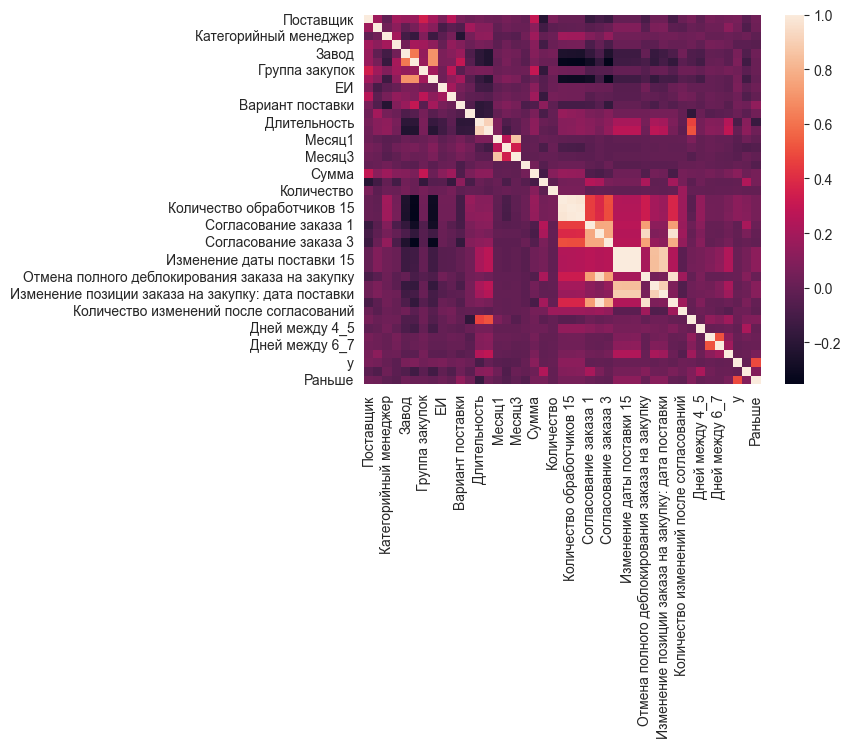

In [564]:
sns.heatmap(df.corr())

<Axes: >

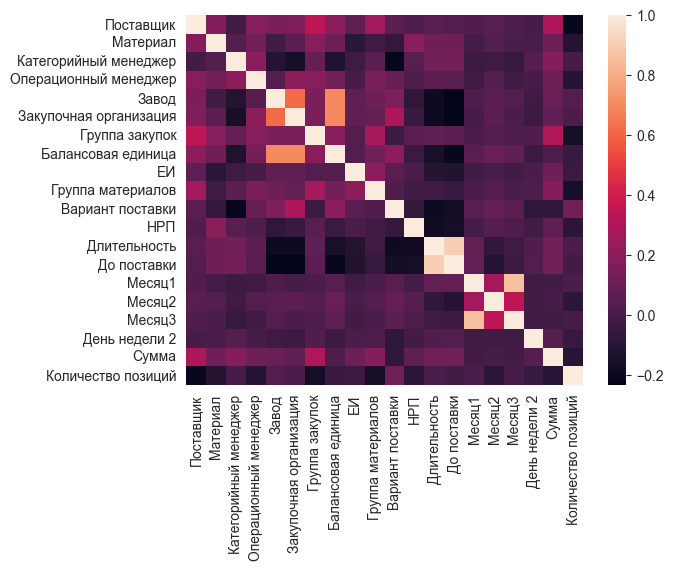

In [565]:
sns.heatmap(df.corr().iloc[:20,:20])

<Axes: >

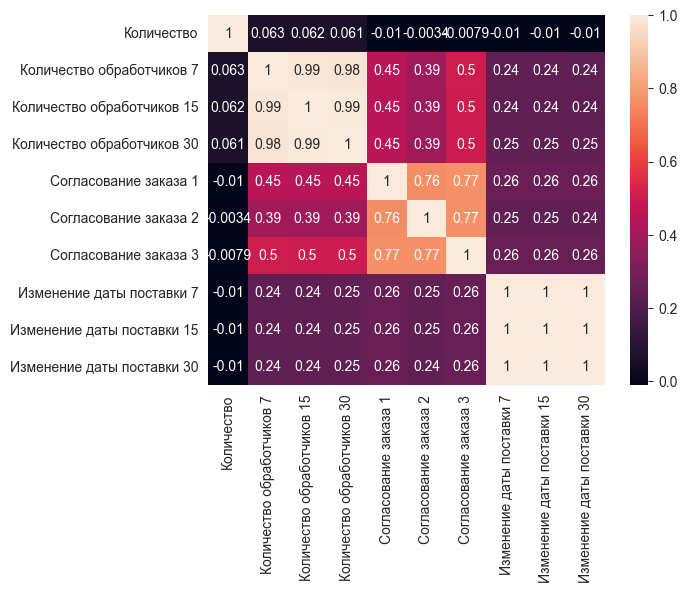

In [566]:
sns.heatmap(df.corr().iloc[20:30,20:30],annot = True)

<Axes: >

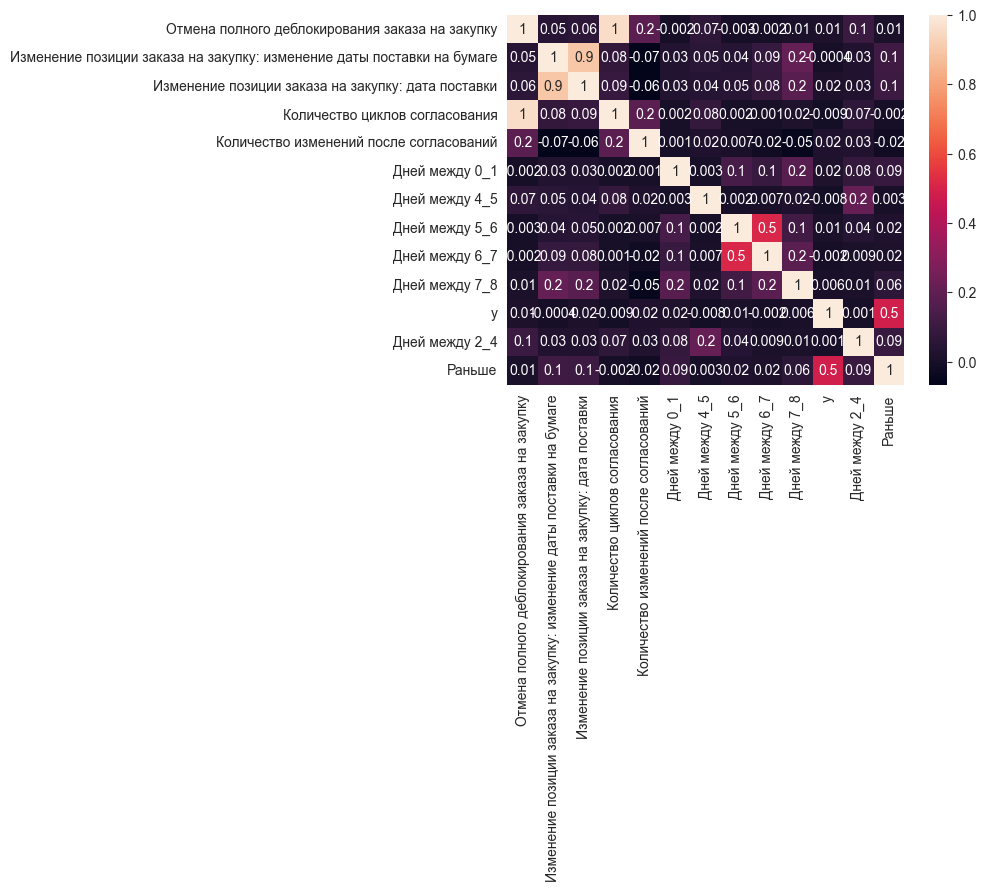

In [567]:
sns.heatmap(df.corr().iloc[30:,30:],annot = True, fmt='.1g')

Корреляция с ответом **("y")**

In [568]:
corr = df.corr()['y'].drop('y')

In [569]:
print(f'Максимальная корреляция с "y" {corr.values.max().round(3)}')

Максимальная корреляция с "y" 0.488


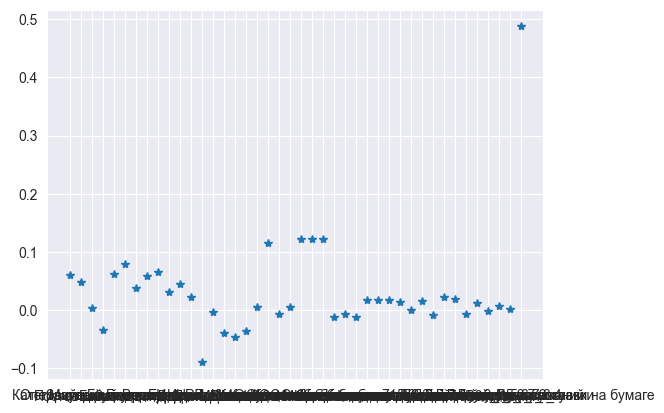

In [570]:
plt.plot(corr, '*')

# Обработка данных

Удаление **входных** данных, которые сильно **коррелируют** между собой

In [571]:
df = df.drop(columns=['Изменение даты поставки 15', 'Изменение даты поставки 30'])
df_test = df_test.drop(columns=['Изменение даты поставки 15', 'Изменение даты поставки 30'])

In [572]:
df.columns

Index(['Поставщик', 'Материал', 'Категорийный менеджер',
       'Операционный менеджер', 'Завод', 'Закупочная организация',
       'Группа закупок', 'Балансовая единица', 'ЕИ', 'Группа материалов',
       'Вариант поставки', 'НРП', 'Длительность', 'До поставки', 'Месяц1',
       'Месяц2', 'Месяц3', 'День недели 2', 'Сумма', 'Количество позиций',
       'Количество', 'Количество обработчиков 7', 'Количество обработчиков 15',
       'Количество обработчиков 30', 'Согласование заказа 1',
       'Согласование заказа 2', 'Согласование заказа 3',
       'Изменение даты поставки 7',
       'Отмена полного деблокирования заказа на закупку',
       'Изменение позиции заказа на закупку: изменение даты поставки на бумаге',
       'Изменение позиции заказа на закупку: дата поставки',
       'Количество циклов согласования',
       'Количество изменений после согласований', 'Дней между 0_1',
       'Дней между 4_5', 'Дней между 5_6', 'Дней между 6_7', 'Дней между 7_8',
       'y', 'Дней между 2_4',

Обработка выбросов методом 5 и 95 перцентилей

In [573]:
def remove_outliers(df, x_name):
    x = 0.05
    Q1 = df[x_name].quantile(x)
    Q3 = df[x_name].quantile(1 - x)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[x_name] >= lower_bound) & (df[x_name] <= upper_bound)]

    return df_filtered

In [574]:
for i in ['Сумма', 'Количество', 'Длительность']:
    df = remove_outliers(df, i)
df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y,Дней между 2_4,Раньше
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,0,1,1,1.0,11,82.0,0.0,-1.0,-1.0,-1.0,1,0.0,True
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0,0,0,1.0,12,27.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,0,1,1,1.0,14,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224992,55,12213,3,2,1,1,5,1,1,5,1,1.0,67,55,8,10,8,2,4.830761,2,8.0,8,8,8,1,1,1,1.0,0,1,1,1.0,15,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
224993,137,27439,1,13,6,5,20,5,1,23,2,0.0,6,1,7,7,7,2,6.307034,167,3.0,5,5,5,0,0,0,0.0,0,0,0,0.0,14,-1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
224996,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0,0,0,1.0,11,1.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
224997,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,2,2,5,2.0,0,-1.0,0.0,-1.0,-1.0,-1.0,0,8.0,False


Повторные графики после удаления некоторых выбросов

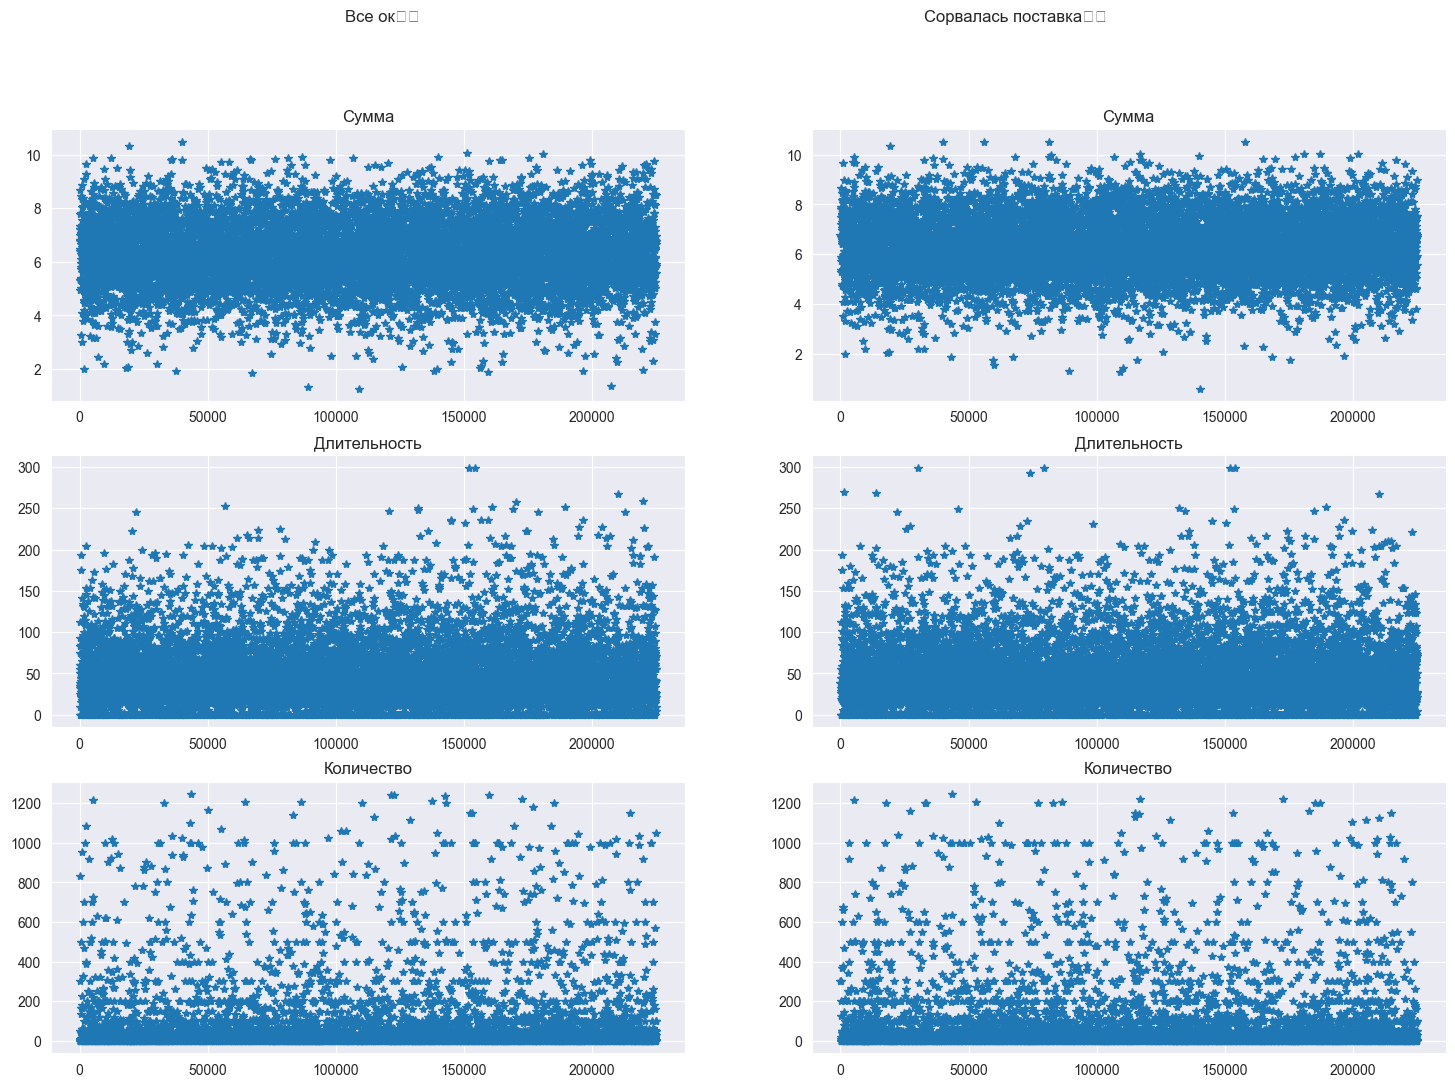

In [575]:
df_y_1_1000 = df[df['y'] == 1].sample(10000)
df_y_0_1000 = df[df['y'] == 1].sample(10000)
graphs(df_y_0_1000, df_y_1_1000)

In [576]:
df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y,Дней между 2_4,Раньше
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,0,1,1,1.0,11,82.0,0.0,-1.0,-1.0,-1.0,1,0.0,True
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0,0,0,1.0,12,27.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,0,1,1,1.0,14,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224992,55,12213,3,2,1,1,5,1,1,5,1,1.0,67,55,8,10,8,2,4.830761,2,8.0,8,8,8,1,1,1,1.0,0,1,1,1.0,15,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
224993,137,27439,1,13,6,5,20,5,1,23,2,0.0,6,1,7,7,7,2,6.307034,167,3.0,5,5,5,0,0,0,0.0,0,0,0,0.0,14,-1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
224996,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0,0,0,1.0,11,1.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
224997,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,2,2,5,2.0,0,-1.0,0.0,-1.0,-1.0,-1.0,0,8.0,False


In [577]:
print(f"Итоговый размер датафрейма: {len(df)}")

Итоговый размер датафрейма: 214075


**Сохранение измененных данных**

In [578]:
df.to_csv(f'train_AIC_processed_v{VERSION}.csv', index=False)

# Обработка df_test

In [579]:
print(f"Размер датафрейма оценивания: {len(df_test)}")

Размер датафрейма оценивания: 25000


In [580]:
df_test

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,Дней между 2_4,Раньше
0,273,269,6,8,1,1,64,1,9,22,1,1.0,45,36,9,11,9,6,6.560264,2,10.0,8,8,8,2,2,1,0.0,0,0,0,1.0,16,0.0,0.0,-1.0,-1.0,-1.0,1.0,False
1,499,27439,1,10,18,16,1,14,1,35,2,1.0,0,0,9,9,9,3,4.362439,6,200.0,4,4,4,0,1,0,0.0,0,0,0,1.0,12,0.0,-1.0,0.0,-1.0,-1.0,-3.0,True
2,86,27439,2,2,1,1,172,1,1,26,2,0.0,28,20,12,1,12,4,7.315035,1,230.0,6,6,6,1,1,1,3.0,0,1,1,1.0,12,3.0,0.0,-1.0,-1.0,-1.0,0.0,False
3,97,4064,2,4,7,1,22,6,3,46,1,0.0,43,43,1,3,1,3,2.883392,6,0.2,7,8,8,1,1,1,2.0,0,1,1,1.0,16,7.0,0.0,-1.0,-1.0,1.0,0.0,True
4,117,27439,2,3,1,1,2,1,1,2,1,1.0,12,3,4,4,4,3,7.333641,7,1.0,7,7,7,1,1,1,1.0,0,1,1,1.0,15,0.0,0.0,-1.0,-1.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,255,6409,3,6,3,1,10,3,1,16,2,0.0,155,54,1,6,1,6,6.537037,5,30.0,10,10,10,2,2,2,0.0,1,0,0,2.0,18,0.0,0.0,-1.0,-1.0,-1.0,0.0,False
24996,1,5827,1,1,7,1,46,6,1,13,1,0.0,74,74,11,1,11,3,7.425021,4,50.0,8,8,8,2,2,2,4.0,1,1,1,2.0,0,1.0,0.0,-1.0,-1.0,-1.0,0.0,True
24997,8,6504,6,5,3,1,17,3,1,21,2,1.0,5,5,11,12,12,3,5.703462,13,2.0,6,6,6,1,1,1,0.0,0,0,0,1.0,9,2.0,0.0,-1.0,-1.0,-1.0,0.0,True
24998,18,1309,7,17,1,1,44,1,1,142,2,1.0,36,36,1,2,1,3,9.059027,6,48.0,9,10,10,2,3,3,0.0,2,0,0,3.0,31,8.0,0.0,-1.0,-1.0,-1.0,1.0,True


Проверка правильности количества колонок

In [581]:
print(len(df.columns), len(df_test.columns))
for i in df.columns:
    if i not in df_test.columns:
        print(i)
for i in df_test.columns:
    if i not in df.columns:
        print(i)

41 40
y


**Сохранение измененных данных**

In [582]:
df_test.to_csv(f'test_AIC_processed_v{VERSION}.csv', index=False)

# Выбор модели и обучение

*Можно разделить обучение и обработку на несколько файлов для удобства файлы были объединены*

# Загрузка данных

In [583]:
df = pd.read_csv(f'train_AIC_processed_v{VERSION}.csv')
df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y,Дней между 2_4,Раньше
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,0,1,1,1.0,11,82.0,0.0,-1.0,-1.0,-1.0,1,0.0,True
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0,0,0,1.0,12,27.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,0,1,1,1.0,14,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214070,55,12213,3,2,1,1,5,1,1,5,1,1.0,67,55,8,10,8,2,4.830761,2,8.0,8,8,8,1,1,1,1.0,0,1,1,1.0,15,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
214071,137,27439,1,13,6,5,20,5,1,23,2,0.0,6,1,7,7,7,2,6.307034,167,3.0,5,5,5,0,0,0,0.0,0,0,0,0.0,14,-1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False
214072,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0,0,0,1.0,11,1.0,0.0,-1.0,-1.0,-1.0,0,0.0,False
214073,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,2,2,5,2.0,0,-1.0,0.0,-1.0,-1.0,-1.0,0,8.0,False


In [584]:
df_test = pd.read_csv(f'test_AIC_processed_v{VERSION}.csv')

# Выбор модели

Метрика **F1 - score**

In [585]:
def f1_loss(y_true, y_pred, beta=1):
    '''
    Метрика F1 - score
    '''

    assert y_true.shape[1] == 1
    assert y_pred.shape[1] == 1


    tp = (y_true * y_pred).sum()
    tn = ((1 - y_true) * (1 - y_pred)).sum()
    fp = ((1 - y_true) * y_pred).sum()
    fn = (y_true * (1 - y_pred)).sum()

    epsilon = 1e-7

    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)

    f1 = (1 + beta**2)* (precision*recall) / (beta**2 * precision + recall + epsilon)

    return f1

**Бутстрап** метод для определения качества модели

In [586]:
def mean_squared_error(l1, l2):
    return sum([abs(l1[i] - l2[i]) for i in range(min(len(l1), len(l2)))]) / len(l1)


def mean_absolute_error(l1, l2):
    return sum([(l1[i] - l2[i]) ** 2 for i in range(min(len(l1), len(l2)))]) / len(l1)


def my_accuracy(l1, l2):
    return sum([(l1[i] == l2[i]) for i in range(min(len(l1), len(l2)))]) / len(l1)

In [587]:
from math import floor
import numpy as np
import random

def round_to_3(x):
    return round(x, 3)

def cut_on_edges(l, fraction_to_cut):
    to_cut = floor(len(l) * fraction_to_cut)
    return l[to_cut:len(l) - to_cut]


def bootstrap_confidence_interval_solution(y, y_pred, fraction_to_cut=0.005, random_gen=random.Random(), f=my_accuracy):

    y_and_y_pred = list(zip(y, y_pred))
    ans = []
    for i in range(100):
        rand = random_gen.choices(y_and_y_pred, k=len(y_and_y_pred))
        ans.append(f([i[0] for i in rand], [i[1] for i in rand]))
    ans.sort()
    ans = cut_on_edges(ans, fraction_to_cut)
    return round_to_3(ans[0]), round_to_3(ans[-1])

def run_bootstrap(y_true, y_pred, f0=my_accuracy):
  _0 = bootstrap_confidence_interval_solution(y_true, y_pred, f=f0)
  print("===================================================================")
  print(f"Значение оценки модели находится в диапазоне между {_0[0]} и {_0[1]}")


In [588]:
def model_check(model_now, df):
  X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df['y'], test_size=0.25)
  if isinstance(model_now, CatBoostClassifier):
    model_now.fit(X_train, y_train, logging_level='Silent')
  else:
    model_now.fit(X_train, y_train)
  Value = model_now.predict(X_test)
  run_bootstrap(y_test, Value)

# Пример выбора нескольких моделей

Модель 1 - linealRegration


In [589]:
model_1 = LogisticRegression(penalty='none', max_iter=100)

In [590]:
import warnings
warnings.filterwarnings('ignore')

In [591]:
model_check(model_1, df)

Значение оценки модели находится в диапазоне между 0.853 и 0.86


Модель 2 - Catboost без параметров

In [592]:
model_2 = CatBoostClassifier()

In [593]:
model_check(model_2, df)

Значение оценки модели находится в диапазоне между 0.929 и 0.935


*Дополнительные тесты моделей находятся в файле model.py*

**Идеальной моделью оказалась модель Catboost с оптимизацией гиперпараметров при помощи optuna**

# Обучение модели и подбор гиперпараметров

In [594]:
!pip install optuna

In [595]:
X_train, y_train = df.drop(columns='y'), df['y']

In [596]:
i_use_optuna = False
def use_optuna(df):
    global i_use_optuna
    i_use_optuna = True
    import optuna
    import catboost
    from optuna.samplers import TPESampler
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
        classification_report
    def objective(trial):
        model = catboost.CatBoostClassifier(
            iterations=trial.suggest_int("iterations", 100, 25000),
            learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
            depth=trial.suggest_int("depth", 4, 10),
            l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
            bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
            one_hot_max_size=trial.suggest_int("one_hot_max_size", 10, 60),
            random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
            bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
            od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
            od_wait=trial.suggest_int("od_wait", 10, 300),
            verbose=False
        )
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.2, random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    sampler = TPESampler(seed=1)
    study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
    study.optimize(objective, n_trials=1)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial
    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


In [597]:
# use_optuna(df)

Финальная модель

Для ускорения исполнения кода будут использованы параметры optuna сгенерированные ранее

In [598]:
ct_model = None
if i_use_optuna:
    ct_model = catboost.CatBoostClassifier(**trial.params)
else:
    ct_model = CatBoostClassifier(iterations=17978,
                                  depth=9,
                                  l2_leaf_reg=18,
                                  leaf_estimation_iterations=10,
                                  random_strength=74,
                                  random_state=175,
                                  learning_rate=0.7392103907886278,
                                  rsm=0.5177137168244701)

In [599]:
ct_model.fit(X_train, y_train)

0:	learn: 0.2868563	total: 37.1ms	remaining: 11m 7s
1:	learn: 0.2736530	total: 76.7ms	remaining: 11m 29s
2:	learn: 0.2628088	total: 120ms	remaining: 11m 57s
3:	learn: 0.2551126	total: 158ms	remaining: 11m 50s
4:	learn: 0.2521093	total: 198ms	remaining: 11m 51s
5:	learn: 0.2502193	total: 233ms	remaining: 11m 37s
6:	learn: 0.2490472	total: 269ms	remaining: 11m 31s
7:	learn: 0.2467680	total: 306ms	remaining: 11m 27s
8:	learn: 0.2454783	total: 342ms	remaining: 11m 23s
9:	learn: 0.2441506	total: 374ms	remaining: 11m 12s
10:	learn: 0.2439017	total: 401ms	remaining: 10m 55s
11:	learn: 0.2428212	total: 435ms	remaining: 10m 51s
12:	learn: 0.2417332	total: 466ms	remaining: 10m 43s
13:	learn: 0.2412088	total: 501ms	remaining: 10m 43s
14:	learn: 0.2405854	total: 534ms	remaining: 10m 39s
15:	learn: 0.2382756	total: 570ms	remaining: 10m 40s
16:	learn: 0.2377784	total: 599ms	remaining: 10m 32s
17:	learn: 0.2368896	total: 635ms	remaining: 10m 33s
18:	learn: 0.2354620	total: 667ms	remaining: 10m 30s
19

# Важность каждого фактора в **модели**

In [600]:
importance = ct_model.get_feature_importance(prettified=True)
importance

,Feature Id,Importances
0,Раньше,17.263261
1,Поставщик,6.046539
2,Количество изменений после согласований,5.360668
3,Сумма,4.544494
4,Количество позиций,4.228394
5,Материал,4.049254
6,Группа закупок,3.993343
7,Операционный менеджер,3.767148
8,День недели 2,3.581492
9,Длительность,3.545138


In [601]:
print(f'Самый важный фактор для модели оказался "{importance.iloc[0].values[0]}"')

Самый важный фактор для модели оказался "Раньше"


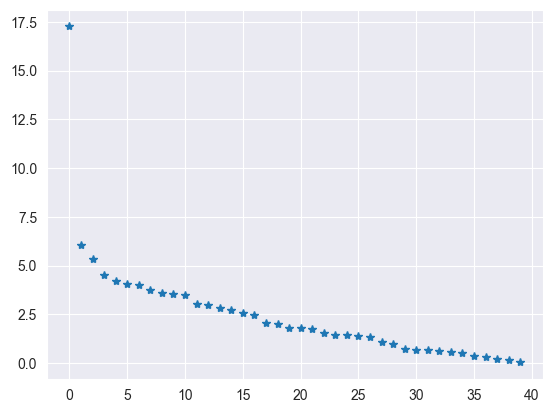

In [602]:
plt.plot(importance['Importances'], '*')
plt.show()

# Predict

In [603]:
Y_test_res = df_test #.drop([], axis=1)
df_test["value"] = ct_model.predict(Y_test_res)

df_test

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,Дней между 2_4,Раньше,value
0,273,269,6,8,1,1,64,1,9,22,1,1.0,45,36,9,11,9,6,6.560264,2,10.0,8,8,8,2,2,1,0.0,0,0,0,1.0,16,0.0,0.0,-1.0,-1.0,-1.0,1.0,False,0
1,499,27439,1,10,18,16,1,14,1,35,2,1.0,0,0,9,9,9,3,4.362439,6,200.0,4,4,4,0,1,0,0.0,0,0,0,1.0,12,0.0,-1.0,0.0,-1.0,-1.0,-3.0,True,0
2,86,27439,2,2,1,1,172,1,1,26,2,0.0,28,20,12,1,12,4,7.315035,1,230.0,6,6,6,1,1,1,3.0,0,1,1,1.0,12,3.0,0.0,-1.0,-1.0,-1.0,0.0,False,0
3,97,4064,2,4,7,1,22,6,3,46,1,0.0,43,43,1,3,1,3,2.883392,6,0.2,7,8,8,1,1,1,2.0,0,1,1,1.0,16,7.0,0.0,-1.0,-1.0,1.0,0.0,True,1
4,117,27439,2,3,1,1,2,1,1,2,1,1.0,12,3,4,4,4,3,7.333641,7,1.0,7,7,7,1,1,1,1.0,0,1,1,1.0,15,0.0,0.0,-1.0,-1.0,0.0,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,255,6409,3,6,3,1,10,3,1,16,2,0.0,155,54,1,6,1,6,6.537037,5,30.0,10,10,10,2,2,2,0.0,1,0,0,2.0,18,0.0,0.0,-1.0,-1.0,-1.0,0.0,False,0
24996,1,5827,1,1,7,1,46,6,1,13,1,0.0,74,74,11,1,11,3,7.425021,4,50.0,8,8,8,2,2,2,4.0,1,1,1,2.0,0,1.0,0.0,-1.0,-1.0,-1.0,0.0,True,1
24997,8,6504,6,5,3,1,17,3,1,21,2,1.0,5,5,11,12,12,3,5.703462,13,2.0,6,6,6,1,1,1,0.0,0,0,0,1.0,9,2.0,0.0,-1.0,-1.0,-1.0,0.0,True,1
24998,18,1309,7,17,1,1,44,1,1,142,2,1.0,36,36,1,2,1,3,9.059027,6,48.0,9,10,10,2,3,3,0.0,2,0,0,3.0,31,8.0,0.0,-1.0,-1.0,-1.0,1.0,True,1


In [604]:
Y_train_res = df.drop(columns=['y'])
df["value"] = ct_model.predict(Y_train_res)

df

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,Вариант поставки,НРП,Длительность,До поставки,Месяц1,Месяц2,Месяц3,День недели 2,Сумма,Количество позиций,Количество,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Отмена полного деблокирования заказа на закупку,Изменение позиции заказа на закупку: изменение даты поставки на бумаге,Изменение позиции заказа на закупку: дата поставки,Количество циклов согласования,Количество изменений после согласований,Дней между 0_1,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y,Дней между 2_4,Раньше,value
0,606,7448,4,5,1,1,9,1,1,150,1,0.0,190,190,10,4,1,3,6.740725,1,4.0,4,4,4,1,1,1,1.0,0,1,1,1.0,11,82.0,0.0,-1.0,-1.0,-1.0,1,0.0,True,1
1,7,27439,1,1,21,15,255,12,3,12,2,1.0,17,12,9,9,9,0,7.876672,22,20.0,6,7,7,0,0,0,0.0,0,0,0,0.0,11,12.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False,0
2,318,27213,1,20,11,12,4,1,1,11,2,1.0,67,43,5,7,6,0,5.029520,1,1.0,5,5,6,1,1,1,0.0,0,0,0,1.0,12,27.0,0.0,-1.0,-1.0,-1.0,0,0.0,False,0
3,1768,19949,5,2,1,1,55,1,1,34,1,0.0,83,66,12,2,12,4,5.987879,5,6.0,7,7,7,1,1,1,1.0,0,1,1,1.0,14,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False,0
4,7,27439,1,1,12,9,8,1,3,12,2,0.0,21,18,12,12,12,1,7.839027,85,20.0,2,2,2,0,0,0,0.0,0,0,0,0.0,7,1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214070,55,12213,3,2,1,1,5,1,1,5,1,1.0,67,55,8,10,8,2,4.830761,2,8.0,8,8,8,1,1,1,1.0,0,1,1,1.0,15,2.0,0.0,-1.0,-1.0,-1.0,0,0.0,False,0
214071,137,27439,1,13,6,5,20,5,1,23,2,0.0,6,1,7,7,7,2,6.307034,167,3.0,5,5,5,0,0,0,0.0,0,0,0,0.0,14,-1.0,-1.0,-1.0,-1.0,-1.0,0,-3.0,False,0
214072,53,794,1,14,1,1,90,1,1,18,1,0.0,37,29,2,3,2,4,4.414871,1,17.0,7,7,7,1,1,1,0.0,0,0,0,1.0,11,1.0,0.0,-1.0,-1.0,-1.0,0,0.0,False,0
214073,68,2661,4,8,1,1,38,1,1,11,1,0.0,98,88,3,6,3,1,4.981459,5,2.0,5,5,5,3,2,2,6.0,2,2,5,2.0,0,-1.0,0.0,-1.0,-1.0,-1.0,0,8.0,False,0


# Оценкка работы модели

Соотношение ответов **"1"** и **"0"**

In [605]:
df['value'].value_counts().loc[0] / df['value'].value_counts().loc[1]

5.9842745750546475

In [606]:
df_test['value'].value_counts().loc[0] / df_test['value'].value_counts().loc[1]

6.557436517533253

Выгрузка ответов в csv

In [607]:
ans = df_test[['Поставщик', 'value']].rename(columns={'Поставщик': "id"})
ans = ans.set_index('id')
ans.to_csv(f'test{VERSION}.csv')

Сравнение с предыдущими результатами

In [608]:
flag = True
try:
  best = pd.read_csv('best.csv', index_col=0)
  bad_res = pd.read_csv('bad_res.csv', index_col=0)
  compare = pd.read_csv('sravn.csv', index_col=0)
except FileNotFoundError:
  flag = False

In [609]:
if flag:
  ls_best_ans = list(best['value'])
  ls_now = list(ans['value'])
  ls_bad_1 = list(bad_res['value'])
  ls_compare = list(compare['value'])

In [610]:
if flag: print(f"Сравнение с нашим лучшим результатом {my_accuracy(ls_best_ans, ls_now)}")

Сравнение с нашим лучшим результатом 0.96792


In [611]:
if flag: print(f"Сравнение с неперспективным результатом {my_accuracy(ls_bad_1, ls_now)}")

Сравнение с неперспективным результатом 0.93912


In [612]:
if flag: print(f"Сравнение с предыдущим результатом {my_accuracy(ls_compare, ls_now)}")

Сравнение с предыдущим результатом 0.94072
